In [225]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans

### K-means with NMF 2 

In [196]:
#Importing data
data =  pd.read_csv("NMF_2",index_col=None, sep="\t", encoding ='utf-8')

In [197]:
data.sample(10)

,Unnamed: 0,0,1,movie_title
1387,1387,0.798879,0.033743,Star Trek V: The Final Frontier
3427,3427,0.780195,0.001332,A Guy Named Joe
1286,1286,0.803489,0.006095,I Dreamed of Africa
3540,3540,0.807906,0.001054,Plush
2286,2286,0.805905,0.003471,The Good Night
1161,1161,0.809698,0.067960,Burn After Reading
1478,1478,0.800393,0.028645,Aladdin
651,651,0.813726,0.034254,Joy
3201,3201,0.808206,0.000000,R.L. Stine's Monsterville: The Cabinet of Souls
3761,3761,0.806877,0.003767,ZMD: Zombies of Mass Destruction


In [198]:
title =pd.DataFrame(data['movie_title'])
movie = data.drop(['Unnamed: 0','movie_title'], axis=1)
movie.sample(10)

,0,1
3953,0.801232,0.028543
3544,0.807926,0.027419
361,0.811055,0.044786
760,0.806504,0.058973
2647,0.803542,0.009307
2820,0.800713,0.009010
3722,0.806436,0.045627
3945,0.807932,0.000000
3157,0.794479,0.016984
2599,0.799109,0.022865


In [199]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(movie)
y_kmeans = kmeans.predict(movie)

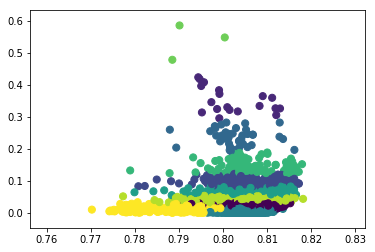

In [200]:
plt.scatter(movie.iloc[:,0], movie.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')

In [201]:
kmeans = KMeans(n_clusters=500)
kmeans.fit(movie)
y_kmeans = kmeans.predict(movie)

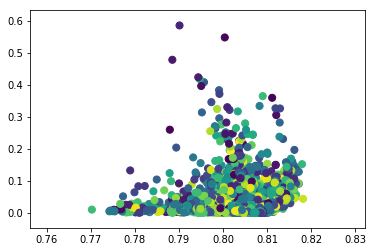

In [191]:
plt.scatter(movie.iloc[:,0], movie.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')

In [202]:
y_kmeans.shape
predict=pd.DataFrame(y_kmeans)

In [203]:
labels = kmeans.labels_
labels

array([355, 139, 208, ...,  24,  24, 222])

In [204]:
df=pd.concat([predict,title],axis=1)
df.columns=['Predict', 'movie_title']
df.sample(10)

,Predict,movie_title
3567,191,The Last Exorcism
2910,335,Cyrus
1487,439,The Big Short
1982,422,House on Haunted Hill
1843,113,How Stella Got Her Groove Back
1791,322,Molière
1499,159,Safe Haven
3724,290,Brigham City
1771,268,Saving Silverman
2899,13,Warlock


In [207]:
indices = pd.Series(df.index, index=df['movie_title'])
indices 

movie_title
Avatar                                             0
Pirates of the Caribbean: At World's End           1
Spectre                                            2
The Dark Knight Rises                              3
John Carter                                        4
Tangled                                            5
Avengers: Age of Ultron                            6
Harry Potter and the Half-Blood Prince             7
Batman v Superman: Dawn of Justice                 8
Superman Returns                                   9
Quantum of Solace                                 10
Pirates of the Caribbean: Dead Man's Chest        11
The Lone Ranger                                   12
Man of Steel                                      13
The Chronicles of Narnia: Prince Caspian          14
Pirates of the Caribbean: On Stranger Tides       15
Men in Black 3                                    16
The Hobbit: The Battle of the Five Armies         17
The Amazing Spider-Man            

In [221]:
def recommendation(title, indices):
    idx = indices.loc[title]
    cluster = df.iloc[idx,0]
    movies = df[df.Predict == cluster].movie_title
    return movies

In [223]:
#recommendation('Spectre\xa0')
idx = indices.loc['Spectre\xa0']
idx
cluster = df.iloc[idx,0]
print(idx, cluster)
movies = df[df.Predict == cluster].movie_title
print(movies)

2 202
2                                   Spectre 
20      The Hobbit: The Desolation of Smaug 
23               Captain America: Civil War 
31          Transformers: Age of Extinction 
237                             The Martian 
379                          Shutter Island 
601                       The Hateful Eight 
1264                       The Tree of Life 
Name: movie_title, dtype: object


In [222]:
recommendation('Spectre\xa0', indices)

2                                   Spectre 
20      The Hobbit: The Desolation of Smaug 
23               Captain America: Civil War 
31          Transformers: Age of Extinction 
237                             The Martian 
379                          Shutter Island 
601                       The Hateful Eight 
1264                       The Tree of Life 
Name: movie_title, dtype: object

### Kmeans with NMF 5

In [211]:
data_2 =  pd.read_csv("NMF_5",index_col=None, sep="\t")

In [212]:
title =pd.DataFrame(data_2['movie_title'])
movie = data_2.drop(['Unnamed: 0','movie_title'], axis=1)
movie.sample(10)

,0,1,2,3,4
2482,1.152866,0.035436,0.003777,0.019362,0.214982
3343,0.991035,0.069505,0.041038,0.266237,0.607588
3389,1.179938,0.046823,0.000000,0.015364,0.000000
771,1.180723,0.047131,0.000000,0.264372,0.000000
2303,1.168894,0.012067,0.000000,0.089594,0.000000
699,1.173112,0.020960,0.000000,0.232497,0.000000
3747,0.926750,0.004068,0.043790,0.027423,1.451223
3770,1.073639,0.024519,0.009520,0.139632,0.680589
336,1.139491,0.042963,0.007636,0.103508,0.220329
2925,0.966516,0.023235,0.042770,0.000000,0.956082


In [213]:
kmeans = KMeans(n_clusters=500)
kmeans.fit(movie)
y_kmeans = kmeans.predict(movie)
predict=pd.DataFrame(y_kmeans)

In [214]:
df=pd.concat([predict,title],axis=1)
df.columns=['Predict', 'movie_title']
df.sample(10)

,Predict,movie_title
2854,475,Thank You for Smoking
2649,1,"Run, Fatboy, Run"
3112,232,Not Easily Broken
2227,3,The Place Beyond the Pines
1345,125,Big Daddy
3557,463,Slacker Uprising
3793,281,Pandora's Box
1145,275,Joe Somebody
3210,116,High School Musical
1383,239,Midnight in Paris


In [215]:
df[df.Predict==100].movie_title


102    I Am Legend 
443          X-Men 
Name: movie_title, dtype: object

In [216]:
indices = pd.Series(df.index, index=df['movie_title'])

In [163]:
idx = indices.loc['Spectre\xa0']
idx
cluster = df.iloc[idx,0]
print(idx, cluster)
movies = df[df.Predict == cluster].movie_title
print(movies)

2 58
2                                   Spectre 
20      The Hobbit: The Desolation of Smaug 
23               Captain America: Civil War 
31          Transformers: Age of Extinction 
38                              World War Z 
44           Transformers: Dark of the Moon 
237                             The Martian 
379                          Shutter Island 
477                            Sucker Punch 
601                       The Hateful Eight 
692                         American Sniper 
1264                       The Tree of Life 
2229                        The Hurt Locker 
Name: movie_title, dtype: object


### Kmeans with Kernel PCA

In [178]:
data_3 =  pd.read_csv("kpca_2",index_col=None, sep="\t")

In [179]:
title =pd.DataFrame(data_3['movie_title'])
movie = data_3.drop(['Unnamed: 0','movie_title'], axis=1)
movie.sample(10)

,0,1,2,3,4
2312,-0.005857,-0.000702,0.000182,0.002826,-0.004197
2675,-0.000718,0.000980,0.003340,-0.000051,-0.004575
558,0.032640,-0.000929,-0.002067,-0.014288,0.009937
111,-0.005319,-0.013398,0.003043,-0.001321,0.003794
2770,-0.002081,0.000552,0.001068,-0.000813,0.002398
344,-0.005266,-0.008536,-0.009823,-0.000792,-0.000017
539,0.001797,-0.007531,0.007488,0.003357,-0.000745
429,0.000095,-0.000704,0.000281,-0.000445,0.001479
4017,-0.000117,-0.000049,0.000763,-0.000304,0.000369
2732,0.001352,-0.003513,-0.004341,0.003461,0.001918


In [180]:
kmeans = KMeans(n_clusters=500)
kmeans.fit(movie)
y_kmeans = kmeans.predict(movie)
predict=pd.DataFrame(y_kmeans)

In [181]:
df=pd.concat([predict,title],axis=1)
df.columns=['Predict', 'movie_title']
df.sample(10)

,Predict,movie_title
2690,71,Elsa & Fred
2186,155,Beetlejuice
1310,225,Stigmata
1139,69,The Grandmaster
3208,443,Paa
3026,234,Deadfall
536,211,Despicable Me
780,1,The Thin Red Line
886,319,Panic Room
1516,307,Kundun


In [182]:
idx = indices.loc['Avatar\xa0']
idx
cluster = df.iloc[idx,0]
print(idx, cluster)
movies = df[df.Predict == cluster].movie_title
print(movies)

0 93
0                                Avatar 
212                        Dante's Peak 
340                         Tower Heist 
1501                    No Reservations 
2082    I Know What You Did Last Summer 
2578                    The Longest Day 
Name: movie_title, dtype: object


In [183]:
idx = indices.loc['Titanic\xa0']
idx
cluster = df.iloc[idx,0]
print(idx, cluster)
movies = df[df.Predict == cluster].movie_title
print(movies)

22 32
22    Titanic 
Name: movie_title, dtype: object


### Kmeans  

In [227]:
data_4 =  pd.read_csv("movie",index_col=None, sep="\t")

In [230]:
movie = data_4.drop(['Unnamed: 0'], axis=1)
print(movie.shape)
movie.sample(10)

(4047, 12)


,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,num_user_for_reviews,imdb_score,duration,title_year
2837,Andrew Currie,140.0,Henry Czerny,Comedy|Drama|Horror|Sci-Fi,Alexia Fast,Fido,Kesun Loder,decapitation|neighbor|neighborhood|next door n...,98.0,6.8,93.0,2006.0
3682,Shane Meadows,99.0,Gary Stretch,Crime|Drama|Thriller,Paddy Considine,Dead Man's Shoes,George Newton,anger|army veteran|independent film|revenge|se...,207.0,7.7,90.0,2004.0
1320,David Cronenberg,441.0,Kyle Schmid,Crime|Drama|Thriller,Viggo Mortensen,A History of Violence,William Hurt,bar|crotch shot|female full frontal nudity|fem...,1125.0,7.5,96.0,2005.0
1839,Jaume Collet-Serra,265.0,CCH Pounder,Horror|Mystery|Thriller,Jimmy Bennett,Orphan,Aryana Engineer,alcoholism|girl|little girl|orphan|troubled ma...,383.0,7.0,123.0,2009.0
1804,Louis Leterrier,171.0,Qi Shu,Action|Crime|Thriller,Jason Statham,The Transporter,Matt Schulze,bar|gunfight|human trafficking|mixed martial a...,460.0,6.8,92.0,2002.0
177,Gore Verbinski,271.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: The Curse of the Bla...,Jack Davenport,caribbean|curse|governor|pirate|undead,2113.0,8.1,143.0,2003.0
515,Oliver Stone,297.0,Austin Pendleton,Drama,Frank Langella,Wall Street: Money Never Sleeps,John Buffalo Mailer,corporate greed|crisis|economy|greed|mentor,245.0,6.3,136.0,2010.0
3197,Mateo Gil,92.0,Dominique McElligott,Action|Adventure|Western,Sam Shepard,Blackthorn,Stephen Rea,assumed identity|bolivia|butch cassidy|doctor|...,40.0,6.6,102.0,2011.0
3441,Tom Hanks,75.0,Charlize Theron,Comedy|Drama|Music,Tom Hanks,That Thing You Do!,Ethan Embry,band|drummer|jazz|pennsylvania|song,212.0,6.9,149.0,1996.0
2349,Jonathan Glazer,454.0,Paul Brannigan,Drama|Horror|Sci-Fi|Thriller,Scarlett Johansson,Under the Skin,Alison Chand,alien|desire|female nudity|male frontal nudity...,616.0,6.3,108.0,2013.0


In [233]:
df = pd.get_dummies(movie)
df.sample(10)

,num_critic_for_reviews,num_user_for_reviews,imdb_score,duration,title_year,director_name_Aaron Hann,director_name_Aaron Schneider,director_name_Abel Ferrara,director_name_Adam Brooks,director_name_Adam Carolla,...,plot_keywords_sex in a car|sex video|sexual desire|sexuality|undressing,plot_keywords_shower|stripper|tap dancing|underwear|undressing,plot_keywords_sibling rivalry|singer|sister act|whistling|wisecrack humor,plot_keywords_solar system|space|spaceship|starship|year 2047,plot_keywords_stage magician,plot_keywords_stand up comedy,plot_keywords_three word title,plot_keywords_title spoken by character,plot_keywords_two word title,plot_keywords_written and directed by cast member
3885,220.0,1473.0,6.9,92.0,2004.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3164,359.0,219.0,7.4,121.0,2011.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3019,36.0,29.0,6.2,97.0,2006.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3461,47.0,40.0,5.9,90.0,2008.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1674,58.0,11.0,6.3,104.0,2012.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2190,140.0,1026.0,8.2,183.0,1978.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,89.0,382.0,7.8,117.0,1992.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3850,3.0,34.0,6.0,101.0,2003.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,341.0,1100.0,8.5,130.0,2006.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,15.0,106.0,8.2,144.0,2006.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
kmeans = KMeans(n_clusters=800)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
predict=pd.DataFrame(y_kmeans)

In [ ]:
df=pd.concat([predict,title],axis=1)
df.columns=['Predict', 'movie_title']
df.sample(10)